In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

cwd = os.getcwd()

parent = os.path.dirname(cwd)

parent

'/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project'

In [3]:
input_dir = parent+r"/data/merged_demand_review_data"
df = pd.read_csv(os.path.join(input_dir,r"rdd_data_2022.csv"))

/Users/juju/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (17,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df["year_month"]  = pd.to_datetime(df["year_month"])
df["year_month"] = df["year_month"].dt.to_period("M")

In [5]:
df = df.rename(columns={"SHARE ID":"shareid"})
df["year"] = df["year_month"].dt.year
df["month"] = df["year_month"].dt.month
l=[]

hotels=df.groupby("shareid")

for name, h in hotels:
    h_resample = h.set_index('year_month').resample('M').asfreq().bfill().reset_index(level=0, drop=False)
    l.append(h_resample)
    
df = pd.concat(l,axis=0)


In [6]:
df = df[df["year"]<=2019]

In [7]:
df_1 = df[(df["year"]>=2000)&(df["year"]<=2004)]
df_1["time_period"] = '2000-2004 period'
df_2 = df[(df["year"]>=2005)&(df["year"]<=2009)]
df_2["time_period"] = '2005-2009 period'
df_3 = df[(df["year"]>=2010)&(df["year"]<=2014)]
df_3["time_period"] = '2010-2014 period'
df_4 = df[df["year"]>=2015]
df_4["time_period"] = '2015-2019 period'

df = pd.concat([df_1,df_2,df_3,df_4],axis=0).reset_index()
df = df.drop(["index"],axis=1)

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [8]:
list(df.columns)

['year_month',
 'shareid',
 'Year Month',
 'Occ',
 'ADR',
 'RevPAR',
 'Market',
 'Operation',
 'Class',
 'Location',
 'Open Date',
 'month_with_revenue',
 'max_str_month',
 'min_str_month',
 'max_review_month',
 'min_review_month',
 'on_ta',
 'post_month',
 'monthly_rating_mean',
 'monthly_review_count',
 'monthly_one_star_count',
 'monthly_two_star_count',
 'monthly_three_star_count',
 'monthly_four_star_count',
 'monthly_five_star_count',
 'monthly_hotel_response_count',
 'month_with_reviews',
 'num_of_reviews',
 'total_one_star',
 'total_two_star',
 'total_three_star',
 'total_four_star',
 'total_five_star',
 'accum_rating',
 'is_reviewed',
 'year',
 'month',
 'time_period']

Text(0.5, 1.0, 'Cumulative growth of Tripadvior reviews')

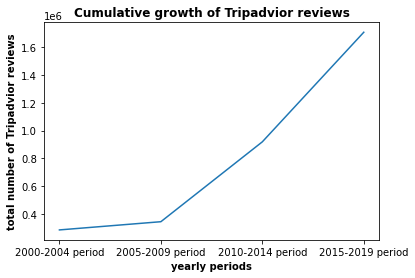

In [9]:
# ploting review by year
df_year = df.groupby("time_period")[["monthly_review_count"]].sum().reset_index()

fig, ax = plt.subplots()
  
ax.plot(df_year["time_period"], df_year["monthly_review_count"])
ax.set_xlabel('yearly periods', 
               fontweight ='bold')
ax.set_ylabel('total number of Tripadvior reviews', 
               fontweight ='bold')

ax.set_title('Cumulative growth of Tripadvior reviews', fontsize = 12, fontweight ='bold')


In [10]:
df_year.index = [1,2,3,4]

In [11]:
period_2000_2004 = np.random.normal(loc=-0.028,scale=0.016,size=10000)
period_2005_2009 = np.random.normal(loc=-0.004,scale=0.005,size=10000)
period_2010_2014 = np.random.normal(loc=0.004,scale=0.003,size=10000)
period_2015_2019 = np.random.normal(loc=0.011,scale=0.003,size=10000)

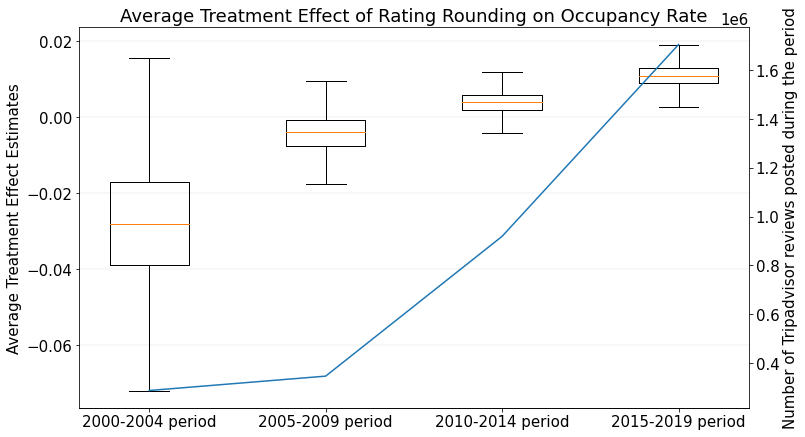

In [20]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Average Treatment Effect of Rating Rounding on Occupancy Rate')
# Set species names as labels for the boxplot
dataset = [period_2000_2004, period_2005_2009, period_2010_2014,period_2015_2019]
labels = list(df_year["time_period"].unique())
ax.boxplot(dataset, labels=labels, showfliers=False,positions=range(len(labels)))

ax2= ax.twinx()
ax2.plot(df_year["time_period"], df_year["monthly_review_count"])

ax.set_ylabel("Average Treatment Effect Estimates")
ax2.set_ylabel("Number of Tripadvisor reviews posted during the period")
plt.savefig('effect_over_time_ch1.png')

In [21]:
print(ax.get_xticks())

[0 1 2 3]


In [22]:
print(ax2.get_xticks())

[0 1 2 3]


In [23]:
period_2000_2005 = np.random.normal(loc=-0.02,scale=0.008,size=10000)
period_2006_2010 = np.random.normal(loc=0.058,scale=0.009,size=10000)
period_2011_2016 = np.random.normal(loc=0.073,scale=0.011,size=10000)

/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/juju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Text(0.5, 1.0, 'Cumulative growth of Tripadvior reviews')

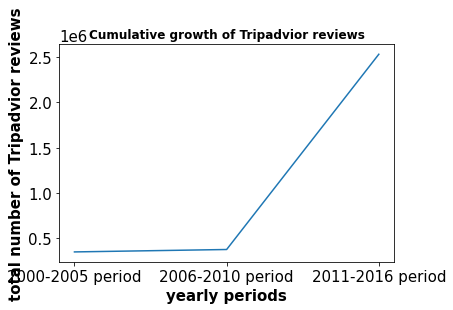

In [24]:
input_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/data/rdd_data"
output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/output/demand"

df_data = pd.read_csv(os.path.join(input_dir,r"all_data.csv"))
df_data = df_data[df_data["year"]<=2016]

df_1 = df[(df["year"]>=2000)&(df["year"]<=2005)]
df_1["time_period"] = '2000-2005 period'
df_2 = df[(df["year"]>=2006)&(df["year"]<=2010)]
df_2["time_period"] = '2006-2010 period'
df_3 = df[(df["year"]>=2011)]
df_3["time_period"] = '2011-2016 period'
df = pd.concat([df_1,df_2,df_3],axis=0).reset_index()

# ploting review by year
df_year = df.groupby("time_period")[["monthly_review_count"]].sum().reset_index()

fig, ax = plt.subplots()
  
ax.plot(df_year["time_period"], df_year["monthly_review_count"])
ax.set_xlabel('yearly periods', 
               fontweight ='bold')
ax.set_ylabel('total number of Tripadvior reviews', 
               fontweight ='bold')

ax.set_title('Cumulative growth of Tripadvior reviews', fontsize = 12, fontweight ='bold')


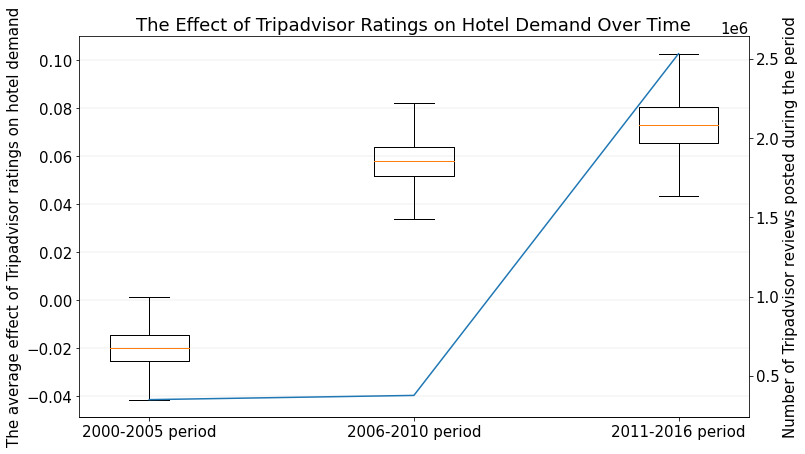

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('The Effect of Tripadvisor Ratings on Hotel Demand Over Time')
# Set species names as labels for the boxplot
dataset = [period_2000_2005, period_2006_2010, period_2011_2016]
labels = list(df_year["time_period"].unique())
ax.boxplot(dataset, labels=labels, showfliers=False,positions=range(len(labels)))

ax2= ax.twinx()
ax2.plot(df_year["time_period"], df_year["monthly_review_count"])

ax.set_ylabel("The average effect of Tripadvisor ratings on hotel demand")
ax2.set_ylabel("Number of Tripadvisor reviews posted during the period")
plt.savefig('effect_over_time_ch2.png')